In [1]:
## Import for data generation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

In [2]:
import nnUtils
from nnUtils import nn_train_test

In [3]:
%%capture 
n_future = 1
n_comp = 10
n_past = 3
discretization_amount = d = 64 # 256 means we keep the whole fire grid
# We are suppressing print statements and warning messages w/ above line
path = "C:\\Users\\nico\\Desktop\\Stanford\\OneDrive - Stanford\\Courses\\CS229\\finalproject\\data\\United_States_Fires\\United_States_2018_Fires\\jan\\storage"
months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug' ,'sep', 'oct', 'nov', 'dec']
x_train, y_train = nn_train_test(path, n_past = n_past, n_comp = n_comp, n_future = n_future, d = d)
for month in months:
    path = "C:\\Users\\nico\\Desktop\\Stanford\\OneDrive - Stanford\\Courses\\CS229\\finalproject\\data\\United_States_Fires\\United_States_2018_Fires\\{mon}\\storage".format(mon = month)
    x, y  = nn_train_test(path, n_past = n_past, n_comp = n_comp, n_future = n_future, d = d)
    if len(x) == 0:
        continue
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y))

In [4]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, HuberRegressor, BayesianRidge, LassoCV
from sklearn import linear_model
from itertools import product
y_train = np.array([np.sum(y) for y in y_train])
x_train, y_train = x_train.reshape((int(x_train.shape[0]), 5, d, d)), y_train.reshape((int(y_train.shape[0]), 1))
y_tr = np.array([np.sum(y) for y in y_train])
y = y_tr[y_tr > 0]

print(x_train.shape, y_tr.shape)

x_tr0 = np.array([np.sum(x[0]) for x in x_train])
x_tr1 = np.array([np.sum(x[1]) for x in x_train])
x_tr2 = np.array([np.sum(x[2]) for x in x_train])

r = 2
X = np.zeros((len(x_tr0), 3**r))

for i in range(len(x_tr0)):
    a = product([x_tr0[i], x_tr1[i], x_tr2[i]], repeat = r)   
    for j, ai in enumerate(a):
        X[i][j] = np.product(list(ai))

#X = np.vstack((x_tr0,x_tr1,x_tr2, x_tr3, x_tr4, x_tr5, x_tr6, x_tr7, x_tr8)).reshape((2325, 9))
print(X.shape)
reg = LinearRegression(positive = True)
reg_history = reg.fit(X, y_tr)

(8560, 5, 64, 64) (8560,)
(8560, 9)


128599.27793135788


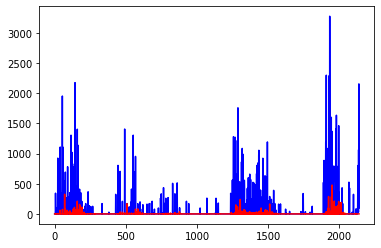

In [5]:
pred = X @ reg.coef_.T
fig = plt.figure()
l = len(X)//4
y = np.array([yi for yi in y_tr])[0:l].reshape((l,))
pred = np.array([p for p in pred])[0:l].reshape((l,))
print(np.sum(np.abs(y - pred)))
plt.plot(range(0,l), y[0:l], 'blue')
plt.plot(range(0,l),pred[0:l], 'red')

In [80]:
%%capture
path = path = "C:\\Users\\nico\\Desktop\\Stanford\\OneDrive - Stanford\\Courses\\CS229\\finalproject\\data\\United_States_Fires\\United_States_2017_Fires\\dec\\storage"
x_test, y_test  = nn_train_test(path, n_past = n_past, n_comp = n_comp, n_future = n_future, d = d)

In [81]:

y_test = np.array([np.sum(y) for y in y_test])
x_te, y_te = x_test.reshape((int(x_test.shape[0]), 5, d, d)), y_test.reshape((int(y_test.shape[0]),))

y = y_te[y_te > 0]
x_tr0 = np.array([np.sum(x[0]) for x in x_te[y_te > 0]])
x_tr1 = np.array([np.sum(x[1]) for x in x_te[y_te > 0]])
x_tr2 = np.array([np.sum(x[2]) for x in x_te[y_te > 0]])

x_tr0 = np.array([np.sum(x[0]) for x in x_te])
x_tr1 = np.array([np.sum(x[1]) for x in x_te])
x_tr2 = np.array([np.sum(x[2]) for x in x_te])


r = 2
X = np.zeros((len(x_tr0), 3**r))
print(len(x_tr0))
for i in range(len(x_tr0)):
    a = product([x_tr0[i], x_tr1[i], x_tr2[i]], repeat = r)   
    for j, ai in enumerate(a):
        X[i][j] = np.product(list(ai))

7008


In [16]:
def sort_list(list1, list2):
 
    zipped_pairs = zip(list2, list1)
 
    z = [x for _, x in sorted(zipped_pairs)]
     
    return z

In [130]:
from keras.models import load_model
model_name = '1D-output-64-11.h5' ## CHANGE THIS (e.g. 'my_model') ##
regressor = load_model(model_name)
x_t= x_test.reshape((int(x_test.shape[0]),d, d, 5))
predict_test = regressor.predict(x_t)
p = predict_test

In [43]:
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

<Figure size 432x288 with 0 Axes>

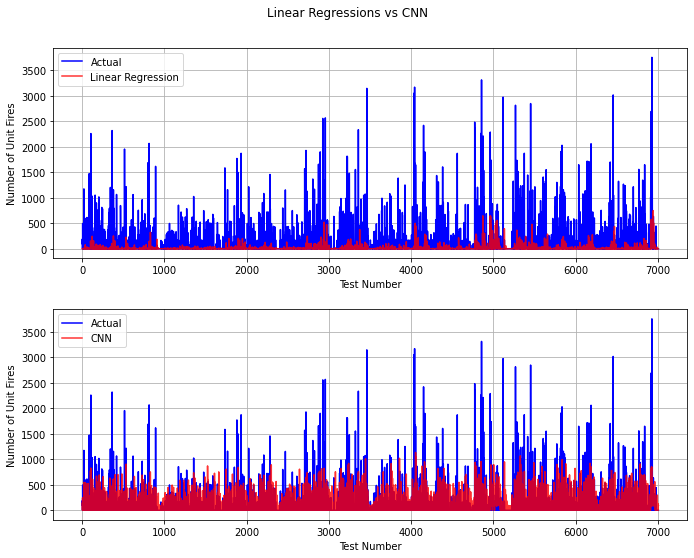

In [167]:
j = 0
X_ = X[j:]
y_te_ = y_te[j:]
p_ = p[j:]
p_[p_ < 80.1] = 0
pred = X_ @ reg.coef_.T
fig = plt.figure()
l = len(X_)
y = np.array([yi for yi in y_te_]).reshape((l,))
pred = np.array([p for p in pred]).reshape((l,))
#pred = np.array(sort_list(pred, y))
p_ = p_.reshape((l,))
#p = np.array(sort_list(p, y))
#y = np.array(sorted(y))
ix = 0
fig, axs = plt.subplots(2, figsize = (10, 8))
fig.suptitle('Linear Regressions vs CNN')

axs[1].plot(range(ix,l), y[ix:l], 'blue',  label = 'Actual')

axs[1].plot(range(ix,l), p_[ix:l], 'red', label = 'CNN', alpha=.8)

axs[0].plot(range(ix,l), y[ix:l], 'blue', label = 'Actual')
axs[0].plot(range(ix,l),pred[ix:l], 'red', label = 'Linear Regression', alpha=.8)
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("Test Number")
axs[0].set_ylabel("Number of Unit Fires")
axs[1].set_xlabel("Test Number")
axs[1].set_ylabel("Number of Unit Fires")
fig.tight_layout(pad=2.0)
axs[0].grid()
axs[1].grid()

plt.savefig('./../images/lin-reg-vs-cnn.png')

In [164]:
print(np.sum(np.abs(y - pred)**2)/len(y))
print(np.sum(np.abs(y - p_)**2)/len(y))
print(np.sum(y == pred), np.sum( y == p_))
print(np.std(pred), np.std(p_))
print(np.mean(pred), np.mean(p_))
print(np.median(pred), np.mean(p_))
np.std(y), np.mean(y), np.median(y)

95530.81143708031
75638.4776794294
3740 3378
44.24868681462701 173.12532
10.394606282256467 112.870415
0.0 112.870415


(299.3089569642712, 110.3978310502283, 0.0)

In [143]:
pr = p_
pr[p_ < 80.1] = 0
np.median(pr)

0.0

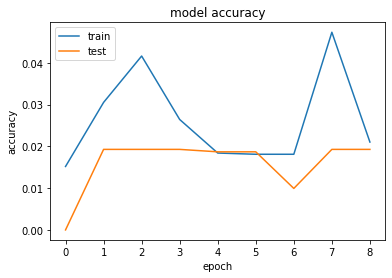

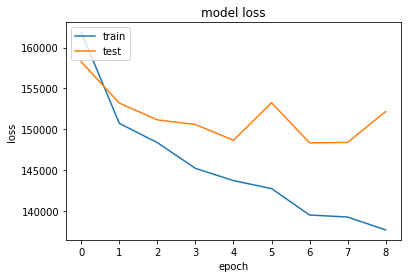

In [110]:
history = {'loss': [161864.671875, 150723.875, 148374.828125, 145228.4375, 143729.953125, 142763.328125, 139527.34375, 139280.4375, 137706.265625], 'acc': [0.0151869161054492, 0.030519859865307808, 0.0416179895401001, 0.026431074365973473, 0.01839953288435936, 0.018107475712895393, 0.018107475712895393, 0.047313082963228226, 0.02102803811430931], 'val_loss': [158244.09375, 153205.40625, 151154.84375, 150590.484375, 148661.03125, 153261.296875, 148342.96875, 148401.359375, 152169.859375], 'val_acc': [0.0, 0.01927570067346096, 0.01927570067346096, 0.01927570067346096, 0.018691588193178177, 0.018691588193178177, 0.009929906576871872, 0.01927570067346096, 0.01927570067346096]}

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

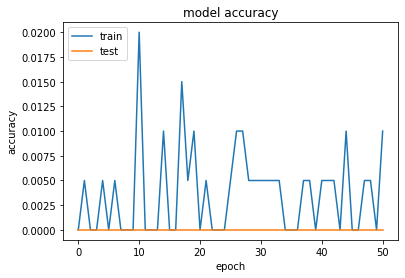

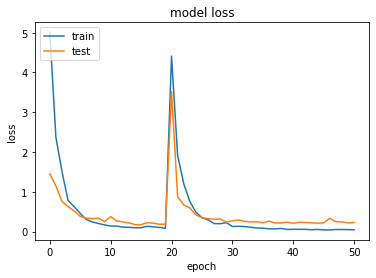

In [166]:
history = {'loss': [5.010929107666016, 2.376124620437622, 1.5122637748718262, 0.7811688780784607, 0.626034140586853, 0.4573746621608734, 0.30381959676742554, 0.24141748249530792, 0.20503246784210205, 0.16797569394111633, 0.13956965506076813, 0.13759303092956543, 0.11308199912309647, 0.10751396417617798, 0.09690976142883301, 0.09851248562335968, 0.13357187807559967, 0.12193910777568817, 0.1045922115445137, 0.08524400740861893, 4.411537170410156, 1.9130340814590454, 1.2079482078552246, 0.7575005292892456, 0.48890894651412964, 0.35008740425109863, 0.29579049348831177, 0.2015705555677414, 0.19894921779632568, 0.22404223680496216, 0.12841519713401794, 0.1329178661108017, 0.12732431292533875, 0.10965719819068909, 0.09048797935247421, 0.08617343008518219, 0.07021196186542511, 0.06697626411914825, 0.07878878712654114, 0.054074496030807495, 0.05733383074402809, 0.057436686009168625, 0.057154469192028046, 0.04668338596820831, 0.05427000671625137, 0.04264729470014572, 0.04232661426067352, 0.05299621447920799, 0.0515989288687706, 0.05058455094695091, 0.04309063032269478], 'acc': [0.0, 0.004999999888241291, 0.0, 0.0, 0.004999999888241291, 0.0, 0.004999999888241291, 0.0, 0.0, 0.0, 0.019999999552965164, 0.0, 0.0, 0.0, 0.009999999776482582, 0.0, 0.0, 0.014999999664723873, 0.004999999888241291, 0.009999999776482582, 0.0, 0.004999999888241291, 0.0, 0.0, 0.0, 0.004999999888241291, 0.009999999776482582, 0.009999999776482582, 0.004999999888241291, 0.004999999888241291, 0.004999999888241291, 0.004999999888241291, 0.004999999888241291, 0.004999999888241291, 0.0, 0.0, 0.0, 0.004999999888241291, 0.004999999888241291, 0.0, 0.004999999888241291, 0.004999999888241291, 0.004999999888241291, 0.0, 0.009999999776482582, 0.0, 0.0, 0.004999999888241291, 0.004999999888241291, 0.0, 0.009999999776482582], 'val_loss': [1.4498440027236938, 1.1491731405258179, 0.7573797702789307, 0.6290591955184937, 0.5176652073860168, 0.3831155002117157, 0.3400333523750305, 0.32450467348098755, 0.3416762948036194, 0.25033676624298096, 0.37591552734375, 0.2674364149570465, 0.24436713755130768, 0.21963459253311157, 0.1747441291809082, 0.17354513704776764, 0.22441701591014862, 0.21172195672988892, 0.1841551810503006, 0.1879231333732605, 3.5187995433807373, 0.8767104148864746, 0.669096052646637, 0.5954312682151794, 0.4200321137905121, 0.347726970911026, 0.3274708688259125, 0.31204745173454285, 0.3179096579551697, 0.23877105116844177, 0.2732875347137451, 0.29154282808303833, 0.25656574964523315, 0.24245351552963257, 0.24766799807548523, 0.2215772569179535, 0.26582401990890503, 0.21665836870670319, 0.22080211341381073, 0.23665304481983185, 0.21163251996040344, 0.23345047235488892, 0.22913295030593872, 0.2209717333316803, 0.21326568722724915, 0.2201935350894928, 0.334147185087204, 0.24698691070079803, 0.24539652466773987, 0.21991178393363953, 0.22781060636043549], 'val_acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

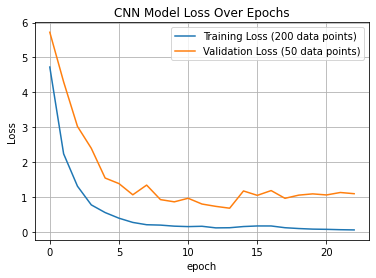

In [190]:
history = {'loss': [4.7246, 2.2341, 1.3051, .7684, .5484, .3864, .2652, .1989, .1882, .1580, .1452, .1547, .1089,.1128, .1470, .1638, .1634, .1135, .0897, .0730, .0669, .0563, .0502, .0424], 'val_loss': [1.4307, 1.0746, .7552, .5980, .3848, .3449, .2646, .3341, .23, .214, .2396, .1982, .1815, .1683, .292, .2605, .2947, .2393, .2622, .2711, .2634, .281, .2724]}
# summarize history for loss
plt.plot(history['loss'][:-1])
plt.plot([4 * h for h in history['val_loss']])
plt.title('CNN Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training Loss (200 data points)', 'Validation Loss (50 data points)'], loc='upper right')
plt.grid()
plt.savefig('./../images/model-loss.png')
plt.show()

In [79]:
np.mean(np.abs(y-p))

159.70035037796157

In [78]:
np.mean(np.abs(y-pred))

129.67570495228404

In [12]:
regress = load_model('3D-Conv-200-example-overfitting.h5')

In [13]:
regress